### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1

In [3]:
df = pd.read_excel('./dataset/Flipkart-Laptops.xlsx')
print(df.columns)

Index(['Product Name', 'ProductID', 'Product image', 'Actual price',
       'Discount price', 'Stars', 'Rating', 'Reviews', 'Description', 'Link'],
      dtype='object')


In [4]:
"""Load the dataset into a pandas Data Frame."""

df = pd.DataFrame(df)

In [5]:
""" Display the first and the last 5 rows of the dataset"""

print(f"\nThe first 5 row of dataset \n{df.head()}")
print(f"\nThe last 5 row of dataset \n{df.tail()}")


The first 5 row of dataset 
                                        Product Name         ProductID  \
0  MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...  COMGZW35W3DSJADN   
1  MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...  COMGZW37ZX66DBHF   
2  DELL Inspiron 3520 Intel Core i3 12th Gen 1215...  COMGJ75HJGFDJ6JN   
3  Acer One (2024) Intel Core i3 11th Gen 1115G4 ...  COMGPF5CQ7VDWDT4   
4  Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...  COMGPYKZAWY8UX6C   

   Product image Actual price Discount price Stars         Rating  \
0            NaN        89990          54990   3.9      7 Ratings   
1            NaN        83990          67990   NIL            NIL   
2            NaN        49240          35660   4.2  1,805 Ratings   
3            NaN        43999          26990   4.2  6,977 Ratings   
4            NaN        59400          27989   4.2  1,263 Ratings   

       Reviews                                        Description  \
0    1 Reviews  Intel Core i5 Processor (1

In [6]:
"""Custom Data Works"""

# df = df.head()
df = df.dropna(axis=1,how='all')
df['Actual price'] = pd.to_numeric(df['Actual price'], errors='coerce')

df['Discount price'] = pd.to_numeric(df['Discount price'], errors='coerce')
df['Discount price'] = df['Discount price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['Rating'] = df['Rating'].str.replace(' Ratings', '')

df['Reviews'] = df['Reviews'].str.replace(' Reviews','')
df['Reviews'] = pd.to_numeric(df['Reviews'].str.replace(',',''),errors='coerce')

df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

print(f"Does any columns contain Null value: \n{df.isna().any(axis=0)}")
df = df.fillna(0)
print(f"\nDoes any columns contain Null value: \n\n{df.isna().any(axis=0)}")



Does any columns contain Null value: 
Product Name      False
ProductID         False
Actual price       True
Discount price     True
Stars              True
Rating            False
Reviews            True
Description       False
Link              False
dtype: bool

Does any columns contain Null value: 

Product Name      False
ProductID         False
Actual price      False
Discount price    False
Stars             False
Rating            False
Reviews           False
Description       False
Link              False
dtype: bool


In [7]:
"""Calculate the total sales of each company"""

df['Total Sales'] = df['Actual price'] - df['Discount price']
print(f"\nThe total sales of each company \n{df}")


The total sales of each company 
                                          Product Name         ProductID  \
0    MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...  COMGZW35W3DSJADN   
1    MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...  COMGZW37ZX66DBHF   
2    DELL Inspiron 3520 Intel Core i3 12th Gen 1215...  COMGJ75HJGFDJ6JN   
3    Acer One (2024) Intel Core i3 11th Gen 1115G4 ...  COMGPF5CQ7VDWDT4   
4    Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...  COMGPYKZAWY8UX6C   
..                                                 ...               ...   
955  Acer Swift Go 14 (2024) AI Powered EVO Intel C...  COMGWKF2VKGAVHDU   
956  HP Victus Intel Core i5 12th Gen 12450H - (16 ...  COMH2DYZHMHZ5UPG   
957  Infinix X1 Slim Series (2024) Intel Core i3 10...  COMGEHP5EFEGWZW5   
958  Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 1...  COMGYHP5ZB4AGZH6   
959  HP (15s-fq5007TU) Intel Core i3 12th Gen 1215U...  COMGYHP5MCEYZHSV   

     Actual price  Discount price  Stars Rating  Revi

In [8]:
"""Display the product name that has price greater than 50000 and less than 80000"""

dfGreaterOrLess = df[(df['Actual price'] > 50000) & (df['Actual price'] < 80000)]
print(f"\nProduct Greater than 50000 and less than 80000 \n{dfGreaterOrLess[['Product Name','Actual price']]}")



Product Greater than 50000 and less than 80000 
                                          Product Name  Actual price
4    Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...       59400.0
5    Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...       63900.0
6    HP FQ Series Intel Core i3 12th Gen 1215U - (8...       50843.0
12   HP AMD Ryzen 5 Hexa Core 5500U - (16 GB/512 GB...       59109.0
19   HP 2023 Intel Core i3 12th Gen 1215U - (8 GB/5...       51266.0
..                                                 ...           ...
950  DELL Intel Core i3 13th Gen 1305U - (8 GB/512 ...       51944.0
951  HP Pavilion AMD Ryzen 5 Hexa Core AMD R5-5600H...       73544.0
952  HP Intel Core i3 12th Gen 1215U - (16 GB/512 G...       52721.0
958  Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 1...       69890.0
959  HP (15s-fq5007TU) Intel Core i3 12th Gen 1215U...       51134.0

[444 rows x 2 columns]


In [9]:

"""Count total number of products which has more than 3000 ratings"""

df['Rating'] = pd.to_numeric(df['Rating'].str.replace(',', ''),errors='coerce')
print(f"\nTotal number of products which has more than 3000 ratings: {df[df['Rating'] > 3000]['Product Name'].count()}")



Total number of products which has more than 3000 ratings: 159


In [10]:

"""Display the product name which has maximum and minimum review count"""

print(f"\nDisplay the Product having maximum reviews \n{df.loc[df['Reviews'].idxmax()]}")
print(f"\nDisplay the Product having minimum reviews \n{df.loc[df['Reviews'].idxmin()]}")



Display the Product having maximum reviews 
Product Name      realme Book(Slim) Intel Evo Intel Core i5 11th...
ProductID                                          COMG5YDPM8FZZWMQ
Actual price                                                69999.0
Discount price                                              47999.0
Stars                                                           4.3
Rating                                                       7975.0
Reviews                                                      1042.0
Description       Powered by 11th Gen Intel Evo Core i5 Processo...
Link              https://www.flipkart.com/realme-book-slim-inte...
Total Sales                                                 22000.0
Name: 419, dtype: object

Display the Product having minimum reviews 
Product Name      MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...
ProductID                                          COMGZW37ZX66DBHF
Actual price                                                83990.0
D

Show the statistical analysis of discount prices:
count       960.00
mean      56030.32
std       33527.08
min           0.00
25%       35990.00
50%       48745.00
75%       67115.00
max      439990.00
Name: Discount price, dtype: float64


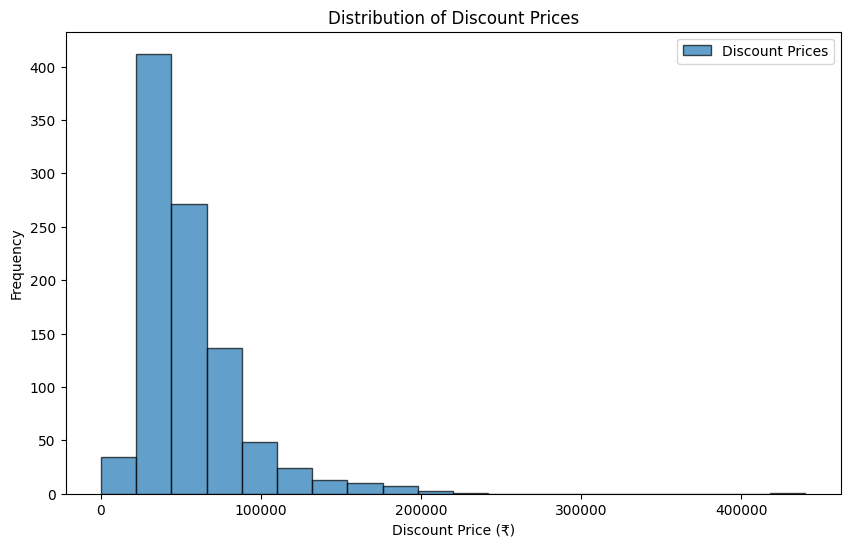

In [25]:
"""Show the statistical analysis of discount prices"""

print(f"Show the statistical analysis of discount prices:\n{np.round(df['Discount price'].describe(),decimals=2)}")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Discount price'], bins=20, edgecolor='black', alpha=0.7,label='Discount Prices')
plt.title('Distribution of Discount Prices')
plt.xlabel('Discount Price (₹)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
"""Show how many product having poor rating(1-2), Average rating (2-3), Good rating (3-4) and Excellent rating (4-5)."""

poorRating = df[df['Stars'] < 2].count()
averageRating = df[(df['Stars'] >= 2 ) & (df['Stars'] < 3)].count()
goodRating = df[(df['Stars'] >= 3 ) & (df['Stars'] < 4)].count()
excellentRating = df[(df['Stars'] >= 4 ) & (df['Stars'] <= 5)].count()

print(f"Show how many product having :")
print(f"\tPoor Rating (1-2): {poorRating['Product Name']}")
print(f"\tAverage Rating (2-3): {averageRating['Product Name']}")
print(f"\tGood Rating (3-4): {goodRating['Product Name']}")
print(f"\tExcellent Rating (4-5): {excellentRating['Product Name']}")


Show how many product having :
	Poor Rating (1-2): 150
	Average Rating (2-3): 9
	Good Rating (3-4): 161
	Excellent Rating (4-5): 640


### Question - 2

In [13]:
result = pd.read_csv("./dataset/olympic/Olympic_Results.csv")
result.shape

(7394, 12)

In [14]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7394 non-null   int64 
 1   event_title          7394 non-null   object
 2   edition              7394 non-null   object
 3   edition_id           7394 non-null   int64 
 4   sport                7394 non-null   object
 5   sport_url            7394 non-null   object
 6   result_date          7394 non-null   object
 7   result_location      7393 non-null   object
 8   result_participants  7394 non-null   object
 9   result_format        7394 non-null   object
 10  result_detail        7394 non-null   object
 11  result_description   7394 non-null   object
dtypes: int64(2), object(10)
memory usage: 693.3+ KB


In [15]:
# Remove a row if any value is missing
result = result.dropna()
result.shape

(7393, 12)

In [16]:
# Drop Row if it contains `na` in columns `result_format`, `result_detail` and `result_description`
for i in ['result_format','result_detail','result_description']:
    result = result[result[i] != 'na']
result.shape

(368, 12)

In [17]:
# Drop Column that we don't required `sport_url`, `edition` and `edition_id`
print(f"Before Drop: {result.columns}")
result = result.drop(columns=['sport_url','edition','edition_id'])
print(f"\nAfter Drop: {result.columns}")

Before Drop: Index(['result_id', 'event_title', 'edition', 'edition_id', 'sport',
       'sport_url', 'result_date', 'result_location', 'result_participants',
       'result_format', 'result_detail', 'result_description'],
      dtype='object')

After Drop: Index(['result_id', 'event_title', 'sport', 'result_date', 'result_location',
       'result_participants', 'result_format', 'result_detail',
       'result_description'],
      dtype='object')


In [18]:
result = result.drop_duplicates(subset='event_title',keep='first')
result.shape

(67, 9)

In [26]:
# Sort in ascending order
print(f"Before sorting:\n{result['result_id'].head()}")
result = result.sort_values(by='result_id')
result.head()

Before sorting:
1213      6
5908     46
5909     54
2        76
1620    154
Name: result_id, dtype: int64


,result_id,event_title,sport,result_date,result_location,result_participants,result_format,result_detail,result_description
1213,6,"Skeleton, Men",Skeleton,3 – 4 February 1948,"Cresta Run, St. Moritz / Celerina",15 from 6 countries,"Six runs, total time determined placement. Fir...",Curves: ? / 15Length: 870 m / 1231 mStart Alti...,Twenty years after the first Olympic skeleton ...
5908,46,"Singles, Men1",Luge,11 – 13 February 1968,"Piste de Luge, Villard-de-Lans",50 from 14 countries,"Three runs, total time determined placement.",Curves: 14Length: 1000 mStart Altitude: 1110 m...,"Although the Germans, who dominated the podium..."
5909,54,"Singles, Women1",Luge,11 – 13 February 1968,"Piste de Luge, Villard-de-Lans",26 from 10 countries,"Three runs, total time determined placement.",Curves: ?Length: ?Start Altitude: ?Vertical Dr...,The women’s competition was overshadowed by a ...
2,76,"Singles, Men",Luge,4 – 7 February 1976,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,"Four runs, total time determined placement.",Curves: 14Length: 1220 mStart Altitude: ?Verti...,"Once more, the competitors from East and West ..."
1620,154,"Singles, Women",Luge,11 – 12 February 1992,"Piste de Bobsleigh et Luge, La Plagne",24 from 12 countries,"Four runs, total time determined placement.",Curves: 14Length: 1143 mStart Altitude: 1652 m...,German sliders had continued to dominate the w...


In [20]:
medal = pd.read_csv("./dataset/olympic/Olympic_Games_Medal_Tally.csv")
print(medal.shape)
medal.columns

(1807, 9)


Index(['edition', 'edition_id', 'year', 'country', 'country_noc', 'gold',
       'silver', 'bronze', 'total'],
      dtype='object')

In [21]:
"""Medal list after 2020"""
medal = medal[medal.year >= 2020]
medal.shape

(122, 9)

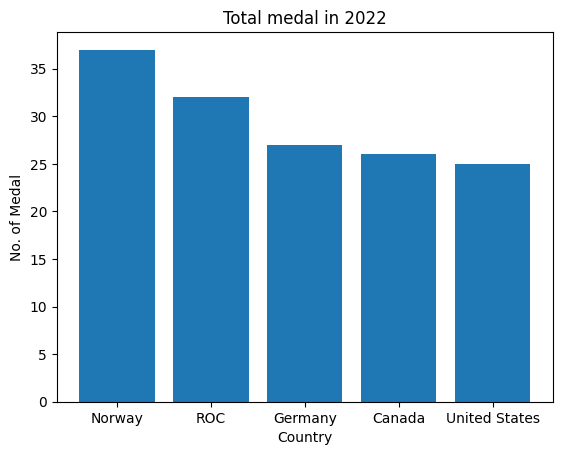

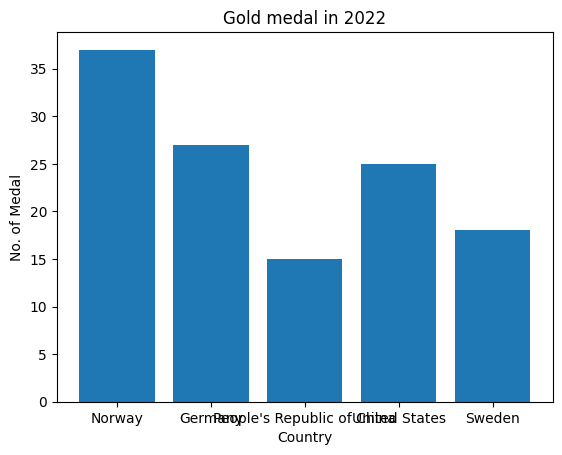

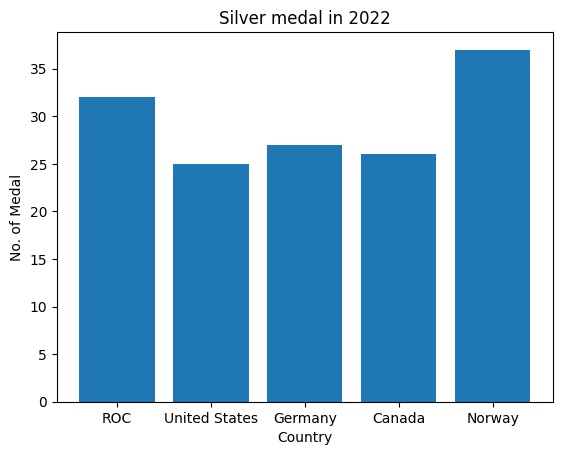

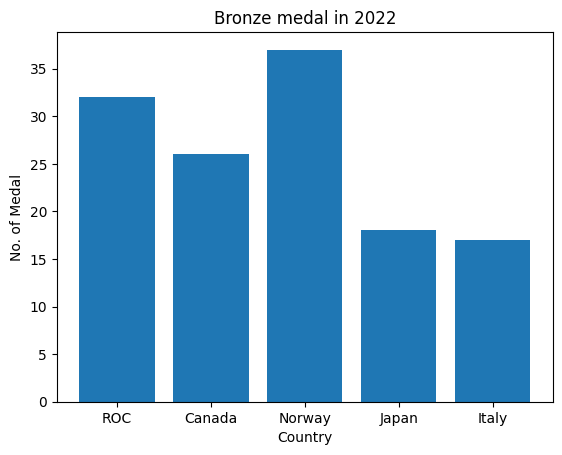

In [22]:
"""Total Medal win by the top 5 country"""
medal = medal[medal.year == 2022]
total = medal.sort_values(by='total',ascending=False)
gold = medal.sort_values(by='gold',ascending=False)
silver = medal.sort_values(by='silver',ascending=False)
bronze = medal.sort_values(by='bronze',ascending=False)

for i in [(total,"Total"),(gold,"Gold"),(silver,"Silver"),(bronze,"Bronze")]:
    x = i[0].head(5)['country'].tolist()
    y = i[0].head(5)['total'].tolist()
    plt.title(f"{i[1]} medal in 2022")
    plt.bar(x,y)
    plt.xlabel("Country")
    plt.ylabel("No. of Medal")
    plt.show()